In [67]:
import torch
import tensorflow
import cv2 as cv
import numpy as np
import pandas as pd
import math
import os
import glob
import matplotlib.pyplot as plt

# Data Prerocessing

In [61]:
## construct images and labels

def process_img(folder ):
    matrix_all = []
    label_all =[]
    imgs = glob.glob('%s/*.jpg'%folder)
    labels = glob.glob('%s/*.att'%folder)
    
    # read images
    for img in imgs:
        image = cv.imread(img)
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        gray_matrix = np.array(gray_image)
        matrix_all.append(gray_matrix)
        
    # read labels
    for label in labels:
        with open(label, 'r') as file:
            for idx, line in enumerate(file):
                if idx ==1:
                    #print(line)
                    single_label = line.split('.')[0]
                    label_all.append(int(single_label))
    return matrix_all, label_all


In [63]:
### shape of data: trainset:1000, testset:250
train_x,train_y = process_img('TrainImages')
test_x, test_y = process_img('TestImages')

# type( train_x[1] ), test_x[2].shape,  test_x[2] len(train_y) ,train_y[2], len(test_x)

(1000, 0)

# (1). Label Distribution

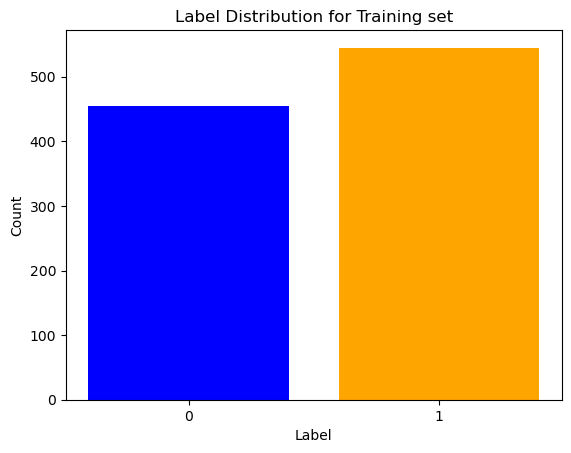

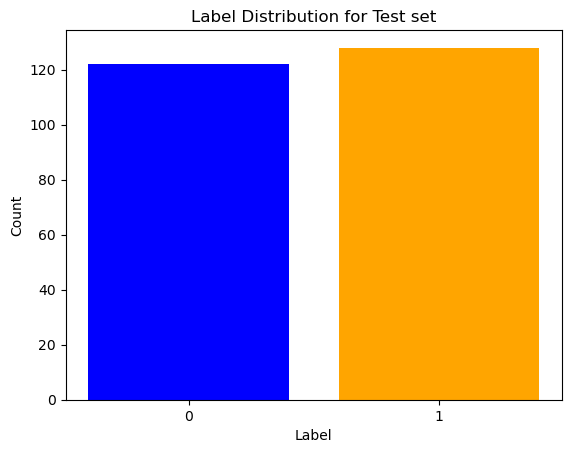

In [86]:
for label_dist, set_name in zip([train_y, test_y],['Training set','Test set']):
    unique_labels, label_counts = np.unique(label_dist, return_counts=True)
    plt.figure(   )
    # 创建直方图
    plt.bar(unique_labels, label_counts, tick_label=unique_labels, color=['blue', 'orange'])

    # 设置图表标题和轴标签
    plt.title('Label Distribution for %s'%set_name)
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

# (2). Single Layer Perceptron